# Task/ Goal 

> Applying all the knowledge for analysis of NLP dataset 

In [114]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
import numpy as np
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
# Load csv file and store it in data variable  
data = pd.read_csv('questions.csv') 

In [3]:
# Some basic checkup

# Dimensions
data.shape #(404351, 6)

# Cheking up first 5 entries
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# Complete info about data variables 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# Dive a little deep using sample

data.sample(15) 

,id,qid1,qid2,question1,question2,is_duplicate
75929,75929,150874,150875,How brilliant people study for exams?,How do I study for NINE exams?,0
111622,111622,221330,221331,How can I get prepared for the 1Z0-444 exam?,How can I prepare for the 1Z0-517 exam?,0
267383,267383,525979,525980,Why does Quora allow users to block other user...,Why doesn't Quora inform users of the reason(s...,0
36809,36809,73342,73343,What are the tips and hacks for getting the cl...,What are the tips and hacks for getting the cl...,0
321178,321178,630093,630094,Does Queen Elizabeth II own 1/6 of Earth’s land?,How was Queen Elizabeth II full title decided?...,0
55086,55086,109605,109606,What are some Indian movies which every Indian...,What are some must watch Indian movies?,1
316948,316948,621937,621938,What are some good names for a dolphin?,How many M16 shots would it take to kill a blu...,0
270708,270708,532427,532428,Relation between phase & line voltage?,What is the difference between phase voltage a...,1
342383,342383,671080,671081,What's wrong in this code?,What is wrong in my C++ code ?,0
341258,341258,668923,668924,What is the biggest mystery you are aware of?,What is the biggest mystery?,0


In [6]:
# Checking for missing values 

data.isnull().sum()

# Single Question missing from Question1 coloumn and 2 Questions missing from Question2 coloumn

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# checking for duplicate values

data.duplicated().sum()

0

<AxesSubplot: >

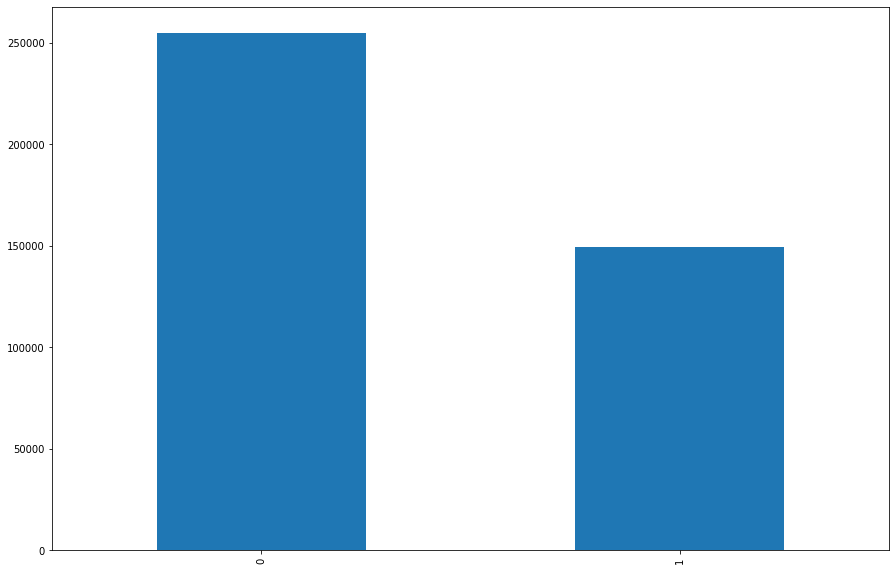

In [164]:
# Plotting for ration of Duplicate and Non duplicate pairs to check for imbalance dataset
plt.figure(figsize=(15, 10)) 
data['is_duplicate'].value_counts().plot(kind= "bar")

In [20]:
# Cheking for % values for duplicate and non duplicate values

print(f"Duplicate entries and non duplicate entries percentage are :\n {data['is_duplicate'].value_counts()/data['is_duplicate'].count() *100}")


# We found that data is little imbalanced or we can skew more toward no. 

Duplicate entries and non duplicate entries percentage are :
 0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


In [73]:
# Number of Uniques Questions
qids = pd.Series(data["qid1"].tolist()+data["qid2"].tolist())
qids

print("Unique Questions are :",len(np.unique(qids)))

print(" Repeated Count are :",sum(qids.value_counts()>1))


Unique Questions are : 789801
 Repeated Count are : 13698


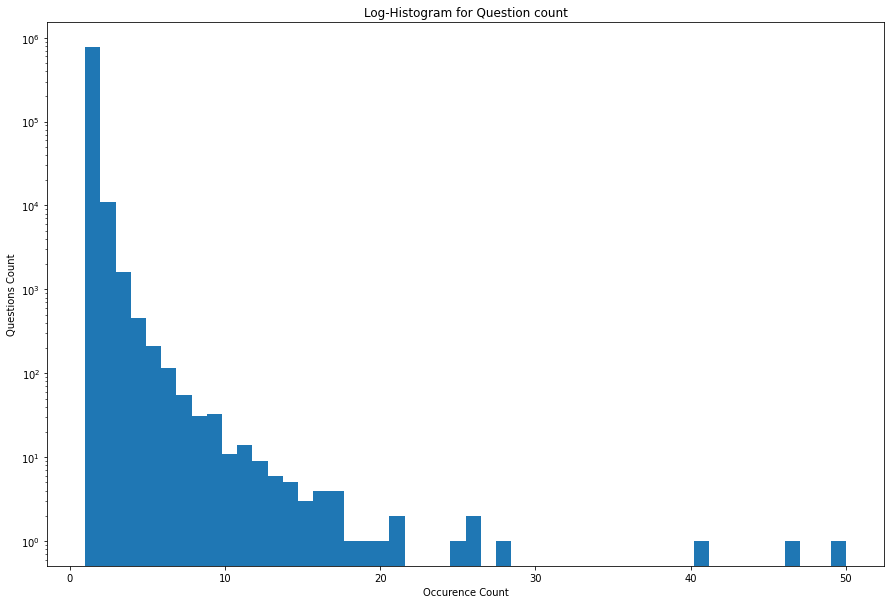

In [163]:
# Visuals
plt.figure(figsize=(15, 10)) 
plt.hist(qids.value_counts(),bins=50)
plt.yscale('log')
plt.title("Log-Histogram for Question count")
plt.xlabel("Occurence Count")
plt.ylabel("Questions Count")
print()

> We observe that Most question appears few time , few question which appear several times and at last but not least very few question are appeared many times .

- It also get noticed that only a single question apppears more than 160 times ( Outlier )
-  positive class percentage is `37%`



# Statical Analysis 

Text(0, 0.5, 'Probability')

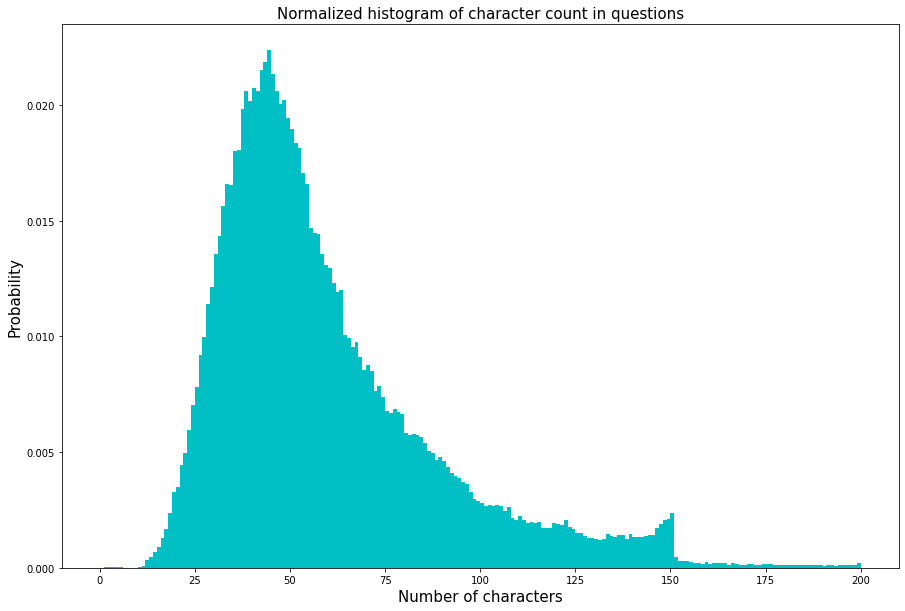

In [98]:
# Create a Series containing the concatenated question texts from 'question1' and 'question2' columns
train_qs = pd.Series(data['question1'].tolist() + data['question2'].tolist()).astype(str)

# Setting up frame
plt.figure(figsize=(15, 10)) 

#  Character length of each question
dist_train = train_qs.str.len()

# Histogram to visualize the distribution of character count
plt.hist(dist_train, bins=200, range=[0, 200], color='#00BFC4', density=True)

# Title of the histogram
plt.title('Normalized histogram of character count in questions', fontsize=15)


# Label for x axis 
plt.xlabel('Number of characters', fontsize=15)

# Label for y-axis 
plt.ylabel('Probability', fontsize=15)

## Results
>The analysis of the character count distribution reveals that most questions have a length between 15 and 150 characters. Although the test distribution differs slightly from the train distribution, the variations are not significant. It is unclear whether the difference is due to the larger size of the test set or other factors, but the test distribution appears to be smoother overall.

>An interesting observation is the sharp decline in the train set's character count distribution after 150 characters, while the test set shows a gradual decrease beyond that point. This pattern could indicate the presence of a character limit imposed by Quora on their questions.

>Furthermore, it's worth mentioning that the histogram is truncated at 200 characters, and the maximum frequency occurs at just under 1200 characters for both sets. However, instances exceeding 200 characters are rare.

> Let's now examine the word count distribution. Please note that a basic word-splitting method is utilized (splitting on spaces) instead of a more advanced tokenizer. Despite this simplified approach, the word count distribution should still provide valuable insights.

>By analyzing the word count distribution, we can gain a better understanding of the lengths and structures of the questions in the dataset.

Text(0, 0.5, 'Probability')

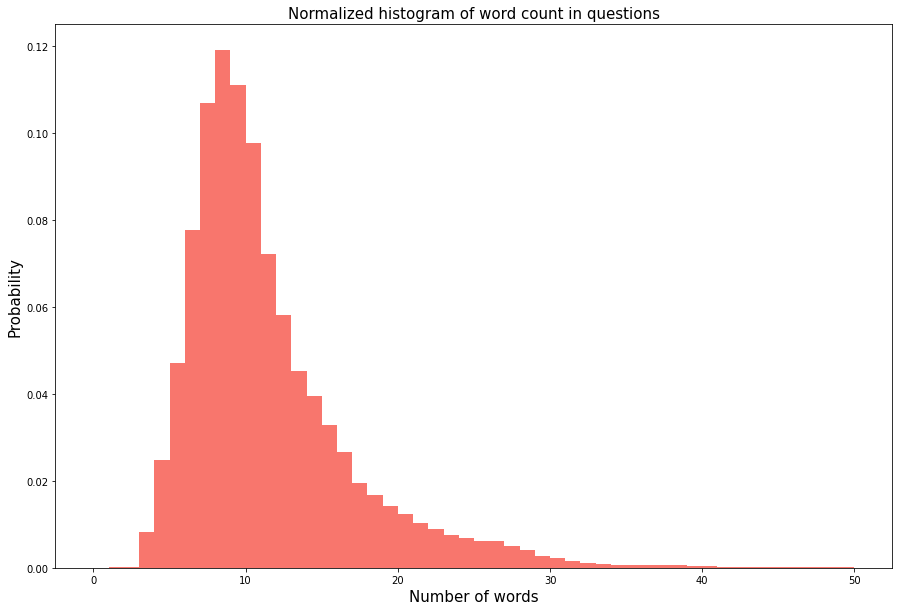

In [99]:
# Calculate Word count of each question by splitting on spaces
dist_train = train_qs.apply(lambda x: len(x.split(' ')))

# Setting up frame
plt.figure(figsize=(15, 10))

# Histogram to visualize the distribution of word count
plt.hist(dist_train, bins=50, range=[0, 50], color='#F8766D', density=True, label='train')

# Title 
plt.title('Normalized histogram of word count in questions', fontsize=15)

# X-label
plt.xlabel('Number of words', fontsize=15)

# Y-label
plt.ylabel('Probability', fontsize=15)

## Result

- We conducted an analysis of the word count distribution in the dataset, which revealed a similar pattern in both the training and test sets. The majority of questions consist of approximately 10 words. However, there are some notable differences between the two distributions. The training set exhibits a more focused and peaked shape, whereas the test set appears to have a broader distribution. Despite these variances, the word count distributions remain relatively similar.

- To gain insights into the most frequently occurring words in the dataset, we generated a word cloud. This process involved aggregating the question texts from both the training and test sets, tokenizing the text into individual words, and then determining the frequency of each word. By visualizing the word cloud, we can easily identify the most common words based on their prominence and size in the cloud.

(-0.5, 1439.5, 1079.5, -0.5)

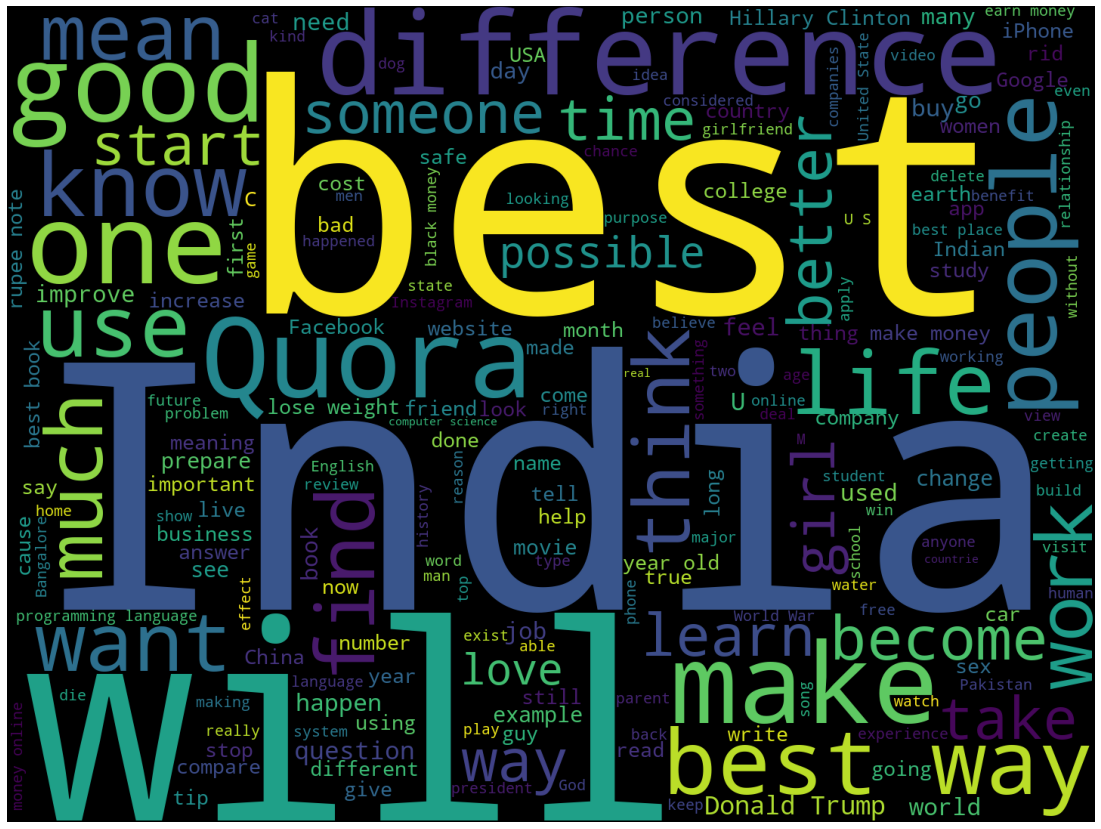

In [95]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# Punctuation Analysis

> Take a look at usage  of punctuations.

> Further on it might help for custom feature creation.

In [100]:
# Percentage of questions with question marks
qmarks = (train_qs.str.contains('\?')).mean() * 100

# Percentage of questions with math tag
math = (train_qs.str.contains('\[math\]')).mean() * 100

# Percentage of questions with full stop mark
fullstop = (train_qs.str.contains('\.')).mean() * 100

# Percentage of questions with First capital
capital_first = (train_qs.str[0].str.isupper()).mean() * 100

# Percentage of questions with capitals
capitals = (train_qs.str.contains('[A-Z]')).mean() * 100

# Percentage of questions with numbers
numbers = (train_qs.str.contains('[0-9]')).mean() * 100

print('Questions with question marks: {:.2f}%'.format(qmarks))
print('Questions with [math] tags: {:.2f}%'.format(math))
print('Questions with full stops: {:.2f}%'.format(fullstop))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first))
print('Questions with capital letters: {:.2f}%'.format(capitals))
print('Questions with numbers: {:.2f}%'.format(numbers))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.82%


Text(0.5, 0, 'word_match_share')

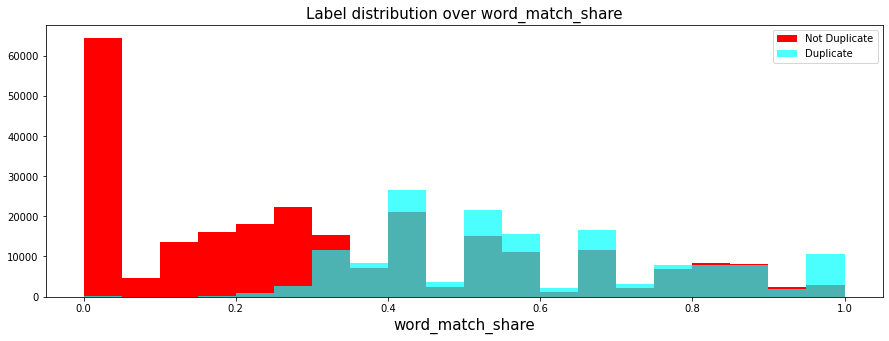

In [109]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R


plt.figure(figsize=(15, 5))
word_match = data.apply(word_match_share, axis=1)
plt.hist(word_match[data['is_duplicate'] == 0], bins=20, label='Not Duplicate',color='#FF0000')
plt.hist(word_match[data['is_duplicate'] == 1], bins=20, alpha=0.7, label='Duplicate', color='#00FFFF')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

- Here we can see that this feature has quite a lot of predictive power, as it is good at separating the duplicate questions from the non-duplicate ones. Interestingly, it seems very good at identifying questions which are definitely different, but is not so great at finding questions which are definitely duplicates.

# DATA CLUSTERING 

### Data Cleaning 

In [111]:
# Data cleaning 
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
data['question1'] = [cleaning(s) for s in data['question1']]
data['question2'] = [cleaning(s) for s in data['question2']]

In [116]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = set(stopwords.words('english'))

# Tokenize and remove stopwords for question1
data['processed_q1'] = data['question1'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop])

# Tokenize and remove stopwords for question2
data['processed_q2'] = data['question2'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop])

In [117]:
data.shape

(404351, 8)

In [118]:
# Filter rows with duplicate values
Duplicate_Questions = data.loc[(data.is_duplicate == 1)]
# Size of Duplicate ques 
len(Duplicate_Questions)

149306

### Applying Tf-Idf 

In [123]:
# New dataframe which contain only repeated ques
Q1_D = pd.DataFrame(Duplicate_Questions)

# Select the 'question1' column from the DataFrame
Q1_Duplicate = Q1_D.question1
# Count of duplicate questions
len(Q1_Duplicate)

# Import vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=3, max_features = 10000)

# Fit the vectorizer on the duplicate questions and covert it in tf-idf format 
tfid = vectorizer.fit_transform(Q1_Duplicate)

# Create a dictionary mapping each feature (word) to its IDF value
tfidf = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))

# Unique word count
len(tfidf)

10000

In [125]:
# Import TruncatedSVD from sklearn
from sklearn.decomposition import TruncatedSVD

# Initialize a TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)

# Apply it on the TF-IDF vectors
svd_tfidf = svd.fit_transform(tfid[:10000])

# Import TSNE from sklearn
from sklearn.manifold import TSNE

# Initialize a TSNE model
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)

# Apply TSNE on transformed vector (SVD)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

C:\Users\ujjwa\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ujjwa\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 0.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.101894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.599594
[t-SNE] KL divergence after 1000 iterations: 1.430610


In [145]:
# import visulaization 
import bokeh.plotting as bp
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_notebook

# display plots
output_notebook()

# Create object with different parameters
plot_tfidf = bp.figure(title="Quora Dataset (tf-idf)",
                       tools="pan,wheel_zoom,box_zoom,reset,hover",
                       x_axis_type=None, y_axis_type=None, min_border=1)

# Scatter plot the t-SNE coordinates
plot_tfidf.scatter(x=tsne_tfidf[:3000, 0], y=tsne_tfidf[:3000, 1])

# Aplying hover tool from toolkit
hover = plot_tfidf.select(HoverTool)

# Display the non-processed and processed text
hover.tooltips = [("non_Proce", "@non_Proce (processed: \"@processed\")")]

# Plot 
show(plot_tfidf)


Loading BokehJS ...

### Applysing Kmeans and tsne 

In [146]:
# Import library
from sklearn.cluster import MiniBatchKMeans

# Setting cluster size
num_clusters = 6

# Initialize and train the MiniBatchKMeans model
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(tfid)

# Assign cluster labels to each data point
kmeans_clusters = kmeans.predict(tfid)

# Compute the distances between each data point and the cluster centers
kmeans_distances = kmeans.transform(tfid)

In [147]:
# Dimensionality reduction using tsne on kmeans distance
tsne_kmeans = tsne_model.fit_transform(kmeans_distances[:1000])

C:\Users\ujjwa\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ujjwa\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.008673
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.493881
[t-SNE] KL divergence after 1000 iterations: 0.693575


In [148]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for j in sorted_centroids[i, :10]:
        print(' %s' % terms[j], end='')
    print()

# sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(num_clusters):
#     print("Cluster %d:" % i, end='')
#     for j in sorted_centroids[i, :10]:
#         print(' %s' % terms[j], end='')
#     print()

Cluster 0: can how does why in is to should get it
Cluster 1: what the is are best to of in which for
Cluster 2: my how can do improve english on get to should
Cluster 3: and the notes between difference what of rs rupee is
Cluster 4: do how you why people to what in get on
Cluster 5: be will trump would donald the if to win what


C:\Users\ujjwa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [162]:
import numpy as np

# Colormap for clusters
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

# plot initiate
output_notebook()

# Setting plot parameters 
plot_kmeans = bp.figure(title="Quora Datset (k-means)",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

# Scatter plot of the t-SNE coordinates with cluster colors
plot_kmeans.scatter(x=tsne_kmeans[:10000,0], y=tsne_kmeans[:10000,1], 
                    color=colormap[kmeans_clusters][:10000])
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"non_Proce": "@non_Proce (processed: \"@processed\"- cluster: @cluster)"}

# Enable plot Visual
show(plot_kmeans)

Loading BokehJS ...